# 1. (Regression problem)

## ASCVD (Heart) Risk veriseti
### kaynakça: 	https://www.kaggle.com/mokar2001/ascvd-heart-risk



## 1.1 kütüphanelerin çağırılması ve Datasetinin okunması 


In [193]:
import pandas as pd
import numpy as np
dt=pd.read_csv("heartRisk.csv")
print(dt)
print("------------------------------------Verisetinin üst kısmı-------------------------------------------------")
print(dt.head())
print("------------------------------------Verisetinin Alt kısmı-------------------------------------------------")
print(dt.tail())



     isMale  isBlack  isSmoker  isDiabetic  isHypertensive  Age  Systolic  \
0         1        1         0           1               1   49       101   
1         0        0         0           1               1   69       167   
2         0        1         1           1               1   50       181   
3         1        1         1           1               0   42       145   
4         0        0         1           0               1   66       134   
..      ...      ...       ...         ...             ...  ...       ...   
995       1        0         1           1               1   42       110   
996       0        1         0           1               0   75       123   
997       1        1         1           0               1   76       178   
998       0        1         1           1               0   65       139   
999       0        1         0           0               0   57       182   

     Cholesterol  HDL  Risk  
0            181   32  11.1  
1            15

## 1.2 Genel Bakış



In [194]:
print(dt.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB
None


## 1.3 Kayıp Verilerinin Tespiti



In [195]:
print(dt.isnull().sum())

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64


#### Yukarıdaki sonuçlara göre eksik veriler rastlanmamıştır.

## 1.4 Tekrarlayan Verilerin Tespiti


In [196]:
print(dt[dt.duplicated()]) 

Empty DataFrame
Columns: [isMale, isBlack, isSmoker, isDiabetic, isHypertensive, Age, Systolic, Cholesterol, HDL, Risk]
Index: []


#### Yukarıdaki sonuçlara göre tekrarlayan veriler rastlanmamıştır.

## 1.5 Kategorik Verilerin Sınıflandırılması


#### isMale","isBlack","isSmoker","isDiabetic","isHypertensive" sütunları kategorik olması lazım

In [197]:
dt=pd.get_dummies(dt,columns=["isMale","isBlack","isSmoker","isDiabetic","isHypertensive"]) 

## 1.6 Istenen Sütunların X Değişkenine Atanması 


In [168]:
x=dt.drop(["Risk"],axis=1) 
print(x)

     Age  Systolic  Cholesterol  HDL  isMale_0  isMale_1  isBlack_0  \
0     49       101          181   32         0         1          0   
1     69       167          155   59         1         0          1   
2     50       181          147   59         1         0          0   
3     42       145          166   46         0         1          0   
4     66       134          199   63         1         0          1   
..   ...       ...          ...  ...       ...       ...        ...   
995   42       110          175   67         0         1          1   
996   75       123          130   56         1         0          0   
997   76       178          179   30         0         1          0   
998   65       139          169   66         1         0          0   
999   57       182          146   38         1         0          0   

     isBlack_1  isSmoker_0  isSmoker_1  isDiabetic_0  isDiabetic_1  \
0            1           1           0             0             1   
1      

## 1.7 Risk Sütünün Y Değişkenine Atanması

In [169]:
y=dt['Risk']
print(y)

0      11.1
1      30.1
2      37.6
3      13.2
4      15.1
       ... 
995     3.9
996    23.9
997    61.3
998    32.3
999    11.7
Name: Risk, Length: 1000, dtype: float64


## 1.8 Normalizasyon
#### verileri 0 ve 1 arasında yeniden ölçekler


In [170]:
x_data=(x-np.min(x))/(np.max(x)-np.min(x)) 

## 1.9 Modelin Eğitilmesi

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## 1.10  Adaboost Modelin Seçilmesi

In [177]:
from sklearn.ensemble import AdaBoostRegressor

## 1.11  Algoritmanin Hyperparametrelerin Belirlenmesi  

In [178]:
ada=AdaBoostRegressor(n_estimators=100,base_estimator=None,loss='square')

#### Loss Fonksiyonun Matematiksel Denklemleri

#### Kaynak :Drucker, Harris. (1997). Improving Regressors Using Boosting Techniques. Proceedings of the 14th International Conference on Machine Learning. 
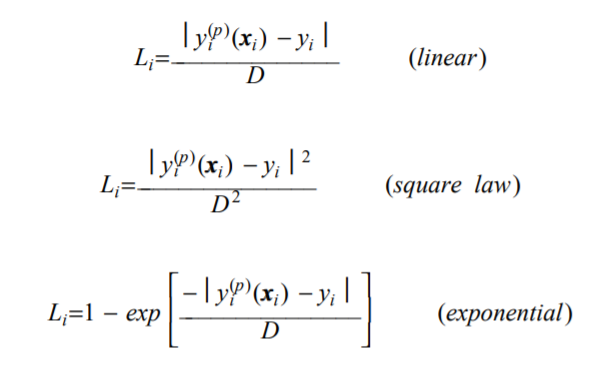

## 1.12 Modelin Fit Edilmesi 

In [179]:
ada.fit(x_train, y_train)

AdaBoostRegressor(loss='square', n_estimators=100)

In [180]:
ada_pred=ada.predict(x_test)

## 1.13 R2 Hesaplanması 

In [181]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [182]:
print("adaboost","r2:",r2_score(y_test,ada_pred))

adaboost r2: 0.8102623503930199


## 1.14 MAPE  ve Diğer Değerlendirme Metotların Hesaplanması 

In [183]:
from sklearn.metrics import mean_absolute_percentage_error
print("adaboost","r2:",r2_score(y_test,ada_pred))

adaboost r2: 0.8102623503930199


In [184]:
print("adaboost","MAPE:",mean_absolute_percentage_error(y_test,ada_pred))

adaboost MAPE: 1.5382288510878441


In [185]:
print("adaboost mae:",mean_absolute_error(y_test,ada_pred))

adaboost mae: 6.139043225491536


In [186]:
print("adaboost mse:",mean_squared_error(y_test,ada_pred))

adaboost mse: 53.895692594687574


## 1.15 K-fold Cross Validation 

In [206]:
from sklearn.model_selection import cross_val_score
kfcv=cross_val_score(estimator=ada,X=x,y=y,cv=10)

#### genellikle k sayısı 5 ya da 10 olarak seçilir, bu çalışmada 10 olarak seçilmiştir.


In [207]:
for i in kfcv:
    print(i)
print("mean value",np.mean(kfcv)) 

0.7809565611498861
0.7357841807699759
0.7141750985393139
0.7879985270024837
0.7840037747668598
0.8193233932692295
0.6310674627099631
0.724143995676318
0.729472683543267
0.7930838235859005
mean value 0.7500009501013197


In [214]:
from sklearn.model_selection import cross_val_score
kfcv=cross_val_score(estimator=ada,X=x,y=y,cv=5)
for i in kfcv:
    print(i)
print("mean value",np.mean(kfcv)) 

0.7474064674727025
0.7414238561230226
0.7886163200544036
0.690251428679568
0.7458562913396478
mean value 0.7427108727338688


## 1.16.1 loss fonk ( linear)
### bu denemde loss fonk linear olarak belirlenrek tekrar model eğitildi

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=50,base_estimator=None,loss='linear')
ada.fit(x_train, y_train)
ada_pred=ada.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print("adaboost","r2:",r2_score(y_test,ada_pred))
print("adaboost","MAPE:",mean_absolute_percentage_error(y_test,ada_pred))
print("adaboost mae:",mean_absolute_error(y_test,ada_pred))
print("adaboost mse:",mean_squared_error(y_test,ada_pred))

adaboost r2: 0.7711573678384074
adaboost MAPE: 1.7035232006312173
adaboost mae: 6.792532433708782
adaboost mse: 65.0036098849547


## 1.16.2 loss fonk ( exponential)
### bu denemde loss fonk exponential olarak belirlenrek tekrar model eğitildi

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=50,base_estimator=None,loss='exponential')
ada.fit(x_train, y_train)
ada_pred=ada.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print("adaboost","r2:",r2_score(y_test,ada_pred))
print("adaboost","MAPE:",mean_absolute_percentage_error(y_test,ada_pred))
print("adaboost mae:",mean_absolute_error(y_test,ada_pred))
print("adaboost mse:",mean_squared_error(y_test,ada_pred))

adaboost r2: 0.7560414337376099
adaboost MAPE: 1.670298415416126
adaboost mae: 7.104418774181664
adaboost mse: 69.29734778708249


## 1.17 Normalizasyon ile 
### sonuçlar normalizasyon olmadan hali ile birbirine yakındır.

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2,random_state=1)
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=50,base_estimator=None,loss='linear')
ada.fit(x_train, y_train)
ada_pred=ada.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print("adaboost","r2:",r2_score(y_test,ada_pred))
print("adaboost","MAPE:",mean_absolute_percentage_error(y_test,ada_pred))
print("adaboost mae:",mean_absolute_error(y_test,ada_pred))
print("adaboost mse:",mean_squared_error(y_test,ada_pred))

adaboost r2: 0.7645175872075348
adaboost MAPE: 1.6598703336543241
adaboost mae: 7.041400639358426
adaboost mse: 66.88966453208941
